In [126]:
# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
papers = pd.read_csv('/Users/shionguha/Documents/GitHub/inf2209-humancentredtopicmodels-fa21/data/NEURIPS Papers/papers.csv')# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and Its Applications,NaN,1-self-organization-of-associative-database-and-its-applications.pdf,Abstract Missing,"767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABASE\nAND ITS APPLICATIONS\nHisashi Suzuki and Suguru Arimoto\nOsaka University, Toyonaka, Osaka 560, ..."
1,10,1987,A Mean Field Theory of Layer IV of Visual Cortex and Its Application to Artificial Neural Networks,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-cortex-and-its-application-to-artificial-neural-networks.pdf,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISUAL CORTEX\nAND ITS APPLICATION TO ARTIFICIAL NEURAL NETWORKS*\nChristopher L. Scofield\nCenter for N...
2,100,1988,Storing Covariance by the Associative Long-Term Potentiation and Depression of Synaptic Strengths in the Hippocampus,NaN,100-storing-covariance-by-the-associative-long-term-potentiation-and-depression-of-synaptic-strengths-in-the-hippocampus.pdf,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\nLONG?TERM POTENTIATION AND DEPRESSION\nOF SYNAPTIC STRENGTHS IN THE HIPPOCAMPUS\nPatric K. Stanton? ...
3,1000,1994,Bayesian Query Construction for Neural Network Models,NaN,1000-bayesian-query-construction-for-neural-network-models.pdf,Abstract Missing,Bayesian Query Construction for Neural\nNetwork Models\nGerhard Paass\nJorg Kindermann\nGerman National Research Center for Computer Science (GMD)...
4,1001,1994,"Neural Network Ensembles, Cross Validation, and Active Learning",NaN,1001-neural-network-ensembles-cross-validation-and-active-learning.pdf,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, and Active Learning\n\nAnders Krogh""\nNordita\nBlegdamsvej 17\n2100 Copenhagen, Denmark\n\nJesper Ved..."


In [127]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
6404,1993,Classification of Electroencephalogram using Artificial Neural Networks,Abstract Missing,"Classification of Electroencephalogram using\nArtificial Neural Networks\n\nA C Tsoi*, D S C So*, A Sergejew**\n*Department of Electrical Engineer..."
3558,2011,Additive Gaussian Processes,We introduce a Gaussian process model of functions which are additive. An additive function is one which decomposes into a sum of low-dimensional...,Additive Gaussian Processes\nDavid Duvenaud\nDepartment of Engineering\nCambridge University\ndkd23@cam.ac.uk\n\nHannes Nickisch\nMPI for Intellig...
702,1999,Robust Learning of Chaotic Attractors,Abstract Missing,Robust Learning of Chaotic Attractors\n\nRembrandt Bakker*\nChemical Reactor Engineering\nDelft Univ. of Technology\n\nr.bakker@stm.tudelft?nl\n\n...
61,1995,Reorganisation of Somatosensory Cortex after Tactile Training,Abstract Missing,"Reorganisation of Somatosensory Cortex after\nTactile Training\n\nRasmus S. Petersen\nJohn G. Taylor\nCentre for Neural Networks, King's College L..."
1425,2002,Kernel Dependency Estimation,Abstract Missing,"Kernel Dependency Estimation\n\nJason Weston, Olivier Chapelle, Andre Elisseeff,\nBernhard Scholkopf and Vladimir Vapnik*\nMax Planck Institute fo..."


In [128]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())# Print out the first rows of papers
papers['paper_text_processed'].head()

6404    classification of electroencephalogram using\nartificial neural networks\n\na c tsoi* d s c so* a sergejew**\n*department of electrical engineerin...
3558    additive gaussian processes\ndavid duvenaud\ndepartment of engineering\ncambridge university\ndkd23@camacuk\n\nhannes nickisch\nmpi for intelligen...
702     robust learning of chaotic attractors\n\nrembrandt bakker*\nchemical reactor engineering\ndelft univ of technology\n\nrbakker@stmtudelftnl\n\njaap...
61      reorganisation of somatosensory cortex after\ntactile training\n\nrasmus s petersen\njohn g taylor\ncentre for neural networks king's college lond...
1425    kernel dependency estimation\n\njason weston olivier chapelle andre elisseeff\nbernhard scholkopf and vladimir vapnik*\nmax planck institute for b...
Name: paper_text_processed, dtype: object

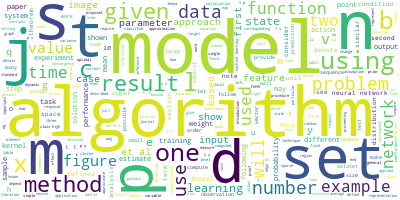

In [129]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [130]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shionguha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [131]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [132]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [133]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [134]:
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

In [135]:
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['classification', 'using', 'artificial', 'neural', 'networks', 'tsoi', 'sergejew', 'department', 'electrical', 'engineering', 'department', 'psychiatry', 'university', 'queensland', 'st', 'lucia', 'queensland', 'australia', 'abstract', 'paper', 'consider', 'problem', 'classifying', 'eeg', 'signals', 'normal', 'subjects', 'subjects', 'suffering', 'psychiatric']


In [136]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 2), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1), (11, 2), (12, 1), (13, 2), (14, 5), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 3), (25, 1), (26, 1), (27, 7), (28, 1), (29, 6)]


In [137]:
from pprint import pprint

# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.005*"model" + 0.005*"learning" + 0.004*"data" + 0.004*"set" + '
  '0.004*"algorithm" + 0.004*"figure" + 0.004*"function" + 0.004*"also" + '
  '0.004*"time" + 0.003*"using"'),
 (1,
  '0.010*"model" + 0.006*"learning" + 0.006*"data" + 0.004*"set" + 0.004*"one" '
  '+ 0.004*"using" + 0.004*"function" + 0.004*"number" + 0.004*"algorithm" + '
  '0.003*"state"'),
 (2,
  '0.006*"time" + 0.005*"model" + 0.005*"set" + 0.005*"data" + '
  '0.005*"learning" + 0.004*"algorithm" + 0.004*"network" + 0.004*"using" + '
  '0.004*"one" + 0.003*"two"'),
 (3,
  '0.006*"algorithm" + 0.005*"model" + 0.004*"set" + 0.004*"time" + '
  '0.004*"learning" + 0.004*"function" + 0.004*"data" + 0.003*"problem" + '
  '0.003*"using" + 0.003*"number"'),
 (4,
  '0.005*"learning" + 0.005*"algorithm" + 0.004*"set" + 0.004*"problem" + '
  '0.004*"data" + 0.004*"function" + 0.004*"model" + 0.004*"time" + '
  '0.004*"using" + 0.003*"one"')]


In [138]:
#nmf demo
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text

from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer

In [139]:
import re
import string

In [140]:
df = pd.read_csv('/Users/shionguha/Documents/GitHub/inf2209-humancentredtopicmodels-fa21/data/inaug_speeches.csv', encoding="latin1")

In [141]:
df.head(20)

,Unnamed: 0,Name,Inaugural Address,Date,text,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162
0,4,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House of Representatives: AMONG the vicissitudes incident to life no event could have fille...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by the voice of my country to execute the functions of its Chief Magistrate. When the occas...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, that no middle course for America remained between unlimited submission to a foreign le...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801","Friends and Fellow-Citizens: CALLED upon to undertake the duties of the first executive office of our country, I avail myself of th...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualification which the Constitution requires before my entrance on the charge again conferred ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9,James Madison,First Inaugural Address,"Saturday, March 4, 1809","UNWILLING to depart from examples of the most revered authority, I avail myself of the occasion now presented to express the profoun...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,James Madison,Second Inaugural Address,"Thursday, March 4, 1813",ABOUT to add the solemnity of an oath to the obligations imposed by a second call to the station in which my country heretofore plac...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11,James Monroe,First Inaugural Address,"Tuesday, March 4, 1817",I SHOULD be destitute of feeling if I was not deeply affected by the strong proof which my fellow-citizens have given me of their co...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12,James Monroe,Second Inaugural Address,"Monday, March 5, 1821",Fellow-Citizens: I SHALL not attempt to describe the grateful emotions which the new and very distinguished proof of the confidence...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,13,John Quincy Adams,Inaugural Address,"Friday, March 4, 1825","IN compliance with an usage coeval with the existence of our Federal Constitution, and sanctioned by the example of my predecessors ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
# Select Rows that are first term inaugural addresses
df = df.drop_duplicates(subset=['Name'], keep='first')# Clean Up Index
df = df.reset_index()# Select only President's Names and their Speeches
df = df[['Name', 'text']]# Set Index to President's Names
df = df.set_index('Name')# Visually Inspect
df.head()

,text
Name,
George Washington,Fellow-Citizens of the Senate and of the House of Representatives: AMONG the vicissitudes incident to life no event could have fille...
John Adams,"WHEN it was first perceived, in early times, that no middle course for America remained between unlimited submission to a foreign le..."
Thomas Jefferson,"Friends and Fellow-Citizens: CALLED upon to undertake the duties of the first executive office of our country, I avail myself of th..."
James Madison,"UNWILLING to depart from examples of the most revered authority, I avail myself of the occasion now presented to express the profoun..."
James Monroe,I SHOULD be destitute of feeling if I was not deeply affected by the strong proof which my fellow-citizens have given me of their co...


In [143]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, 
    remove punctuation, remove read errors,
    and remove words containing numbers.'''    
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('�', ' ', text)    
    
    return text

In [144]:
round1 = lambda x: clean_text_round1(x)

# Clean Speech Text
df["text"] = df["text"].apply(round1)

# Visually Inspect
df.head()

,text
Name,
George Washington,fellow citizens of the senate and of the house of representatives among the vicissitudes incident to life no event could have fille...
John Adams,when it was first perceived in early times that no middle course for america remained between unlimited submission to a foreign le...
Thomas Jefferson,friends and fellow citizens called upon to undertake the duties of the first executive office of our country i avail myself of th...
James Madison,unwilling to depart from examples of the most revered authority i avail myself of the occasion now presented to express the profoun...
James Monroe,i should be destitute of feeling if i was not deeply affected by the strong proof which my fellow citizens have given me of their co...


In [145]:
# Noun extract and lemmatize function

def nouns(text):
    #Given a string of text, tokenize the text 
    #and pull out only the nouns.   
    
    # create mask to isolate words that are nouns
    is_noun = lambda pos: pos[:2] == 'NN'    
    
    # store function to split string of words 
    # into a list of words (tokens)
    tokenized = word_tokenize(text)    
    
    # store function to lemmatize each word
    wordnet_lemmatizer = WordNetLemmatizer()    
    
    # use list comprehension to lemmatize all words 
    # and create a list of all nouns
    all_nouns = [wordnet_lemmatizer.lemmatize(word) \
    for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    
    #return string of joined list of nouns
    return ' '.join(all_nouns)

# Create dataframe of only nouns from speeches
data_nouns = pd.DataFrame(df.text.apply(nouns))

# Visually Inspect
data_nouns.head()

,text
Name,
George Washington,citizen senate house representative vicissitude incident life event anxiety notification order day month hand i country voice i veneration love re...
John Adams,time course america submission legislature independence claim men reflection danger power fleet army contest dissension form government part count...
Thomas Jefferson,friend citizen duty executive office country i myself presence portion fellow citizen thanks favor consciousness task talent presentiment greatnes...
James Madison,example authority i myself occasion profound impression call country station duty i sanction mark confidence proceeding deliberate suffrage nation...
James Monroe,i destitute i proof fellow citizen confidence office function expression opinion conduct service gratification sensibility estimate importance tru...


In [146]:
# Add additional stop words since we are recreating the document-term matrix
stop_noun = ["america", 'today', 'thing']
stop_words_noun_agg = text.ENGLISH_STOP_WORDS.union(stop_noun)

# Create a document-term matrix with only nouns

# Store TF-IDF Vectorizer
tv_noun = TfidfVectorizer(stop_words=stop_words_noun_agg, ngram_range = (1,1), max_df = .8, min_df = .01)


# Fit and Transform speech noun text to a TF-IDF Doc-Term Matrix
data_tv_noun = tv_noun.fit_transform(data_nouns.text)

# Create data-frame of Doc-Term Matrix with nouns as column names
data_dtm_noun = pd.DataFrame(data_tv_noun.toarray(), columns=tv_noun.get_feature_names())

# Set President's Names as Index
data_dtm_noun.index = df.index

# Visually inspect Document Term Matrix
data_dtm_noun.head()

,abandonment,abeyance,ability,abode,abraham,absence,absent,absolute,abstraction,abundance,...,wrongdoing,wrought,year,yes,yesterday,york,yorktown,youth,zeal,zone
Name,,,,,,,,,,,,,,,,,,,,,
George Washington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.027214,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
John Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.089376,0.0,0.0,0.0,0.0,0.0,0.037734,0.000000
Thomas Jefferson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.049273,0.000000
James Madison,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
James Monroe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.030786,0.0,0.0,0.0,0.0,0.0,0.032494,0.049596


In [147]:
def display_topics(model, feature_names, num_top_words,topic_names=None):
#'''Given an NMF model, feature_names, and number of top words, print topic number 
#and its top feature names, up to specified number of top words.'''    
    
    # iterate through topics in topic-term matrix, 'H' aka
    # model.components_
    for ix, topic in enumerate(model.components_):        
        
        #print topic, topic number, and top words
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i] \
             for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [148]:
nmf_model = NMF(2)

# Learn an NMF model for given Document Term Matrix 'V' 
# Extract the document-topic matrix 'W'
doc_topic = nmf_model.fit_transform(data_dtm_noun)

# Extract top words from the topic-term matrix 'H' 
display_topics(nmf_model, tv_noun.get_feature_names(), 5)


Topic  0
constitution, union, principle, congress, peace

Topic  1
american, freedom, man, peace, child


In [149]:
nmf_model = NMF(8)
doc_topic = nmf_model.fit_transform(data_dtm_noun)
display_topics(nmf_model, tv_noun.get_feature_names(), 5)


Topic  0
union, constitution, opinion, territory, principle

Topic  1
american, child, man, generation, job

Topic  2
peace, freedom, civilization, problem, responsibility

Topic  3
congress, business, revenue, policy, party

Topic  4
community, purpose, story, ideal, civility

Topic  5
principle, happiness, confidence, improvement, gratitude

Topic  6
dream, strength, micah, spirit, freedom

Topic  7
process, justice, woman, aspect, party


In [150]:
#BTM Example
import numpy as np
import bitermplus as btm
import tmplot as tmp
import pickle as pkl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [151]:
df = pd.read_csv('/Users/shionguha/Documents/GitHub/inf2209-humancentredtopicmodels-fa21/data/SearchSnippets.txt.gz', header=None, names=['texts'])

In [152]:
texts = df['texts'].str.strip().tolist()

In [153]:
# PREPROCESSING
# Obtaining terms frequency in a sparse matrix and corpus vocabulary
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)
tf = np.array(X.sum(axis=0)).ravel()
# Vectorizing documents
docs_vec = btm.get_vectorized_docs(texts, vocabulary)
docs_lens = list(map(len, docs_vec))
# Generating biterms
biterms = btm.get_biterms(docs_vec)

In [154]:
# INITIALIZING AND RUNNING MODEL
model = btm.BTM(
    X, vocabulary, seed=12321, T=8, M=20, alpha=50/8, beta=0.01)
model.fit(biterms, iterations=20)
p_zd = model.transform(docs_vec)


100%|██████████████████████████████████████████████████████████████████████████████████████| 12295/12295 [00:00<00:00, 111385.83it/s]


In [155]:
# METRICS
perplexity = btm.perplexity(model.matrix_topics_words_, p_zd, X, 8)
coherence = btm.coherence(model.matrix_topics_words_, X, M=20)

In [156]:
tmp.report(model=model, docs=texts)

In [157]:
docs = pd.read_csv('/Users/shionguha/Documents/GitHub/inf2209-humancentredtopicmodels-fa21/data/SearchSnippets.txt.gz', header=None).values.ravel()
phi = tmp.get_phi(model)
phi.head()

topics,0,1,2,3,4,5,6,7
words,,,,,,,,
aaa,3.195102e-08,3.012856e-08,3.047842e-08,3.542745e-08,3.836165e-08,2.961217e-08,2.362519e-08,4.831267e-08
aaas,3.837318e-05,3.012856e-08,3.047842e-08,3.542745e-08,3.836165e-08,5.922729e-04,6.144912e-05,2.903592e-05
aaron,3.195102e-08,3.012856e-08,3.047842e-08,3.542745e-08,4.296888e-04,2.961217e-08,2.362519e-08,4.831267e-08
aau,3.195102e-08,3.012856e-08,3.047842e-08,3.542745e-08,3.836165e-08,2.961217e-08,2.362519e-08,4.203686e-04
abbreviations,7.990951e-05,3.163800e-04,3.047842e-08,3.542745e-08,3.836165e-08,2.961217e-08,2.386144e-06,4.831267e-08


In [158]:
tmp.get_theta(model).head()

docs,0,1,2,3,4,5,6,7,8,9,...,12285,12286,12287,12288,12289,12290,12291,12292,12293,12294
topics,,,,,,,,,,,,,,,,,,,,,
0,0.354702,0.294777,0.178074,0.332888,0.596412,0.726975,0.099094,0.257602,0.532725,0.471059,...,0.026639,0.042030,0.057234,0.006313,0.006232,0.009572,0.001054,0.017922,0.015376,0.031247
1,0.000245,0.007173,0.021324,0.019411,0.029472,0.008740,0.011804,0.036323,0.011349,0.003909,...,0.032604,0.112638,0.032564,0.082661,0.019711,0.127421,0.109506,0.030517,0.025531,0.049617
2,0.003073,0.057144,0.013837,0.014514,0.011813,0.002588,0.000247,0.027391,0.002325,0.005435,...,0.018470,0.140967,0.008236,0.002069,0.000566,0.011241,0.001084,0.020147,0.003234,0.071262
3,0.003678,0.029281,0.010010,0.001287,0.027349,0.004351,0.018189,0.085879,0.011453,0.002965,...,0.900939,0.600111,0.677321,0.350898,0.875420,0.426372,0.672399,0.805926,0.931418,0.535746
4,0.000927,0.035162,0.001736,0.319421,0.024606,0.042996,0.019524,0.036119,0.001910,0.039332,...,0.011359,0.091567,0.037989,0.513782,0.009559,0.094109,0.084863,0.077151,0.012476,0.211272


In [159]:
tmp.get_top_docs(docs, model=model)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7
0,taxes rates tax rates income tax rates lookup trust income tax rates,cancer tobacco cancers cancer tobacco cigarettes smoking lung cancer tobacco cancer percent lung cancer tobacco cancers cancer,imdb name julia roberts julia roberts imdb movies celebs,espn espn team,goalkeepers goalkeepers goalkeepers,parallel computing italy,mozilla mozilla xml html browser open-source xml html browser implementing level dom,proof fermat theorem proof fermat theorem proof
1,currency converter currency exchange currency exchange rates currency converter currency insights influence exchange rates currencies currency con...,nutrition fats fatty diet dietary fats fatty foods count fat healthier eat fatty foods,lyrics lyrics girl band lyrics movie soundtrack lyrics lyrics girl band lyrics,cricket cricket cricket,diegomaradona diego maradona english,intel dual core intel core duo intel core duo extreme intel dual core dual core intel core duo intel core extreme intel core duo chips,master degree programs masters degree phd degree programs masters degree program master degree phd programs master degree,mathworld wolfram pythagorean theorem wolfram mathworld proofs fundamental theorem
2,currency exchange rate conversion calculator convert money currencies exchange rates,vitamins supplements vitamins health supplements herbal supplements vitamin nutritional information vitamin supplements herbal supplements acids v...,movie character,nba basketball tickets chicago bulls tickets chicago bulls tickets chicago bulls basketball tickets chicago bulls tickets buy chicago bulls basket...,globalsecurity military world iraq navy iraqi navy iraqi naval force founded war iraqi navy coastal defense force,biologists journal cell science,finaid scholarships finaid scholarships finaid guide scholarships information scholarship searches scholarships scholarships scholarships,poetry persian poetry poetry iranian poets persian poetry poetry iranian poets persian poets
3,finance income tax salary income tax indian salary income tax salary income tax india income tax indian salary income tax salary income tax india ...,breast cancer symptoms diagnosis symptoms diagnosis breast cancer symptoms skin breast cancers symptoms,movie movie,miniclip games boom boom volleyball boom boom volleyball miniclip games play games games miniclip com boom boom volleyball boom boom volleyball be...,britannica article diego armando maradona diego armando maradona encyclopaedia britannica diego armando maradona argentine football soccer player ...,anandtech anandtech intel dual core performance preview core cache chips core pentium,apache api dom document document xml standard api document interface html xml document root document tree access,andrew century poem poems poet poetry poets poet bell poetry poems poem
4,income tax tax salary tax india salary salary income calculated section income tax act salary,hepatitis hepatitis hepatitis hepatitis symptoms treatment overview symptoms diagnosis treatment hepatitis hepatitis hepatitis,celebrities cruise celebrity tom cruise tom cruise clarkson tom,nba chicago bulls tickets chicago bulls tickets chicago bulls basketball ticket brokers online chicago bulls ticket broker games chicago bulls nba...,maradona diego armando maradona diego armando maradona born buenos argentina family,springerlink genre journal issn natural hazards,schools dom default xml dom tutorial xml document object model xml dom standard dom xml document node tree,root cern root roottalk roottalk roottalk formula expression formula expression value draw formula expression draw int


In [160]:
topics_coords = tmp.prepare_coords(model)
topics_coords.head()

,x,y,topic,size,label
0,42.697697,368.436646,0,12.102385,0
1,323.020233,-110.167290,1,13.519410,1
2,-7.801935,16.974932,2,13.493259,2
3,99.341240,-321.638245,3,10.749254,3
4,-205.189377,-276.993134,4,10.930099,4


In [161]:
tmp.plot_scatter_topics(topics_coords, size_col='size', label_col='label')

alt.LayerChart(...)

In [167]:
terms_probs = tmp.calc_terms_probs_ratio(phi, topic=7, lambda_=1)
tmp.plot_terms(terms_probs)

alt.Chart(...)

In [163]:
top_docs_topic0 = tmp.get_top_docs(docs, model=model, docs_num=2, topics=[0])
top_docs_topic0

,topic0
0,taxes rates tax rates income tax rates lookup trust income tax rates
1,currency converter currency exchange currency exchange rates currency converter currency insights influence exchange rates currencies currency con...


In [164]:
tmp.plot_docs(top_docs_topic0)

,topic0
0,taxes rates tax rates income tax rates lookup trust income tax rates
1,currency converter currency exchange currency exchange rates currency converter currency insights influence exchange rates currencies currency conversion


In [165]:
tmp.report(model, docs=docs, height=400, width=250)